In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error

%matplotlib inline

In [2]:
COVID_CONFIRMED_URL = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'

covid_worldwide_df = pd.read_csv(COVID_CONFIRMED_URL)

covid_worldwide_df['Province/State'].fillna('', inplace=True)
covid_worldwide_df['Country/Region'].fillna('', inplace=True)

covid_worldwide_df.info() 
covid_worldwide_df.isna().sum().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 266 entries, 0 to 265
Columns: 185 entries, Province/State to 7/20/20
dtypes: float64(2), int64(181), object(2)
memory usage: 384.6+ KB


0

In [3]:
covid_confirmed_long = pd.melt(covid_worldwide_df,
                               id_vars=covid_worldwide_df.iloc[:, :4],
                               var_name='date',
                               value_name='confirmed')
covid_confirmed_long.shape
covid_confirmed_long.head()

,Province/State,Country/Region,Lat,Long,date,confirmed
0,,Afghanistan,33.93911,67.709953,1/22/20,0
1,,Albania,41.15330,20.168300,1/22/20,0
2,,Algeria,28.03390,1.659600,1/22/20,0
3,,Andorra,42.50630,1.521800,1/22/20,0
4,,Angola,-11.20270,17.873900,1/22/20,0


In [4]:
## For linear regression data ## 

## Use the US for our prediction, and narrow down to the US to test our regression model. ## 

# Group by the country, date and drop coordinates

covid_us_df = covid_confirmed_long.groupby(['Country/Region', 'date'], sort=False).sum().reset_index()
covid_us_df.drop(['Lat', 'Long'], axis=1)

covid_us_df = covid_us_df[covid_us_df['Country/Region']=='US']

covid_us_df

,Country/Region,date,Lat,Long,confirmed
156,US,1/22/20,40.0,-100.0,1
344,US,1/23/20,40.0,-100.0,1
532,US,1/24/20,40.0,-100.0,2
720,US,1/25/20,40.0,-100.0,2
908,US,1/26/20,40.0,-100.0,5
...,...,...,...,...,...
33244,US,7/16/20,40.0,-100.0,3576157
33432,US,7/17/20,40.0,-100.0,3647715
33620,US,7/18/20,40.0,-100.0,3711413
33808,US,7/19/20,40.0,-100.0,3773260


In [5]:
days = np.array([
    row for row in range(len(covid_us_df['date']))])

days = days.reshape(-1, 1)
days

array([[  0],
       [  1],
       [  2],
       [  3],
       [  4],
       [  5],
       [  6],
       [  7],
       [  8],
       [  9],
       [ 10],
       [ 11],
       [ 12],
       [ 13],
       [ 14],
       [ 15],
       [ 16],
       [ 17],
       [ 18],
       [ 19],
       [ 20],
       [ 21],
       [ 22],
       [ 23],
       [ 24],
       [ 25],
       [ 26],
       [ 27],
       [ 28],
       [ 29],
       [ 30],
       [ 31],
       [ 32],
       [ 33],
       [ 34],
       [ 35],
       [ 36],
       [ 37],
       [ 38],
       [ 39],
       [ 40],
       [ 41],
       [ 42],
       [ 43],
       [ 44],
       [ 45],
       [ 46],
       [ 47],
       [ 48],
       [ 49],
       [ 50],
       [ 51],
       [ 52],
       [ 53],
       [ 54],
       [ 55],
       [ 56],
       [ 57],
       [ 58],
       [ 59],
       [ 60],
       [ 61],
       [ 62],
       [ 63],
       [ 64],
       [ 65],
       [ 66],
       [ 67],
       [ 68],
       [ 69],
       [ 70],
      

In [6]:
covid_us_confirmed = list(covid_us_df['confirmed'][90:])
covid_us_confirmed

[809318,
 837422,
 871617,
 907908,
 940829,
 968518,
 990983,
 1015518,
 1043038,
 1072667,
 1106829,
 1136024,
 1161611,
 1184086,
 1208271,
 1233527,
 1261409,
 1288587,
 1314320,
 1334084,
 1352962,
 1375152,
 1396110,
 1423727,
 1449027,
 1474128,
 1493132,
 1514901,
 1535350,
 1559157,
 1584512,
 1608653,
 1630476,
 1651289,
 1670280,
 1689163,
 1707445,
 1730260,
 1754764,
 1779214,
 1799124,
 1816479,
 1837374,
 1857332,
 1878683,
 1903907,
 1926639,
 1944370,
 1961785,
 1979912,
 2000706,
 2023656,
 2048986,
 2074542,
 2094366,
 2114026,
 2137731,
 2163290,
 2191099,
 2222579,
 2255328,
 2281767,
 2312303,
 2347491,
 2382426,
 2422299,
 2467554,
 2510259,
 2549864,
 2590668,
 2636414,
 2687588,
 2742049,
 2795361,
 2841241,
 2891124,
 2936077,
 2996098,
 3054699,
 3117946,
 3185737,
 3245925,
 3304942,
 3364157,
 3431574,
 3498902,
 3576157,
 3647715,
 3711413,
 3773260,
 3830010]

In [19]:
x = days[90:].reshape(-1,1)
y = list(np.log(covid_us_confirmed))

x

array([[ 90],
       [ 91],
       [ 92],
       [ 93],
       [ 94],
       [ 95],
       [ 96],
       [ 97],
       [ 98],
       [ 99],
       [100],
       [101],
       [102],
       [103],
       [104],
       [105],
       [106],
       [107],
       [108],
       [109],
       [110],
       [111],
       [112],
       [113],
       [114],
       [115],
       [116],
       [117],
       [118],
       [119],
       [120],
       [121],
       [122],
       [123],
       [124],
       [125],
       [126],
       [127],
       [128],
       [129],
       [130],
       [131],
       [132],
       [133],
       [134],
       [135],
       [136],
       [137],
       [138],
       [139],
       [140],
       [141],
       [142],
       [143],
       [144],
       [145],
       [146],
       [147],
       [148],
       [149],
       [150],
       [151],
       [152],
       [153],
       [154],
       [155],
       [156],
       [157],
       [158],
       [159],
       [160],
      

In [8]:
## Train, Test, Split ## 

x_train, x_test, y_train, y_test = train_test_split(x, y,
                                                    test_size=0.1,
                                                    shuffle=False)

In [9]:
## Fitting ## 

linear_model = LinearRegression(fit_intercept=True)
linear_model.fit(x_train, y_train)

LinearRegression()

In [10]:
## Testing prediction ## 

y_pred = linear_model.predict(x_test)

y_pred

array([14.97444514, 14.98927275, 15.00410035, 15.01892796, 15.03375556,
       15.04858317, 15.06341077, 15.07823838, 15.09306599, 15.10789359])

In [11]:
print('MAE:', mean_absolute_error(y_pred, y_test))
print('MSE:',mean_squared_error(y_pred, y_test))

MAE: 0.03654860104899331
MSE: 0.001475143981117409


In [12]:
a = linear_model.coef_
b = linear_model.intercept_

In [27]:
# To see how COVID will be predicted in daily cases up to winter, we will take the number of days added to the range
# Current date - 7/21/2020 
# Projected date - 12/21/2020, Winter Solstice, 153 Days. 
# We will forecast 185 to account for the first month of winter 
x_forecast = list(np.arange(len(days), len(days) + 185))
x_forecast

[181,
 182,
 183,
 184,
 185,
 186,
 187,
 188,
 189,
 190,
 191,
 192,
 193,
 194,
 195,
 196,
 197,
 198,
 199,
 200,
 201,
 202,
 203,
 204,
 205,
 206,
 207,
 208,
 209,
 210,
 211,
 212,
 213,
 214,
 215,
 216,
 217,
 218,
 219,
 220,
 221,
 222,
 223,
 224,
 225,
 226,
 227,
 228,
 229,
 230,
 231,
 232,
 233,
 234,
 235,
 236,
 237,
 238,
 239,
 240,
 241,
 242,
 243,
 244,
 245,
 246,
 247,
 248,
 249,
 250,
 251,
 252,
 253,
 254,
 255,
 256,
 257,
 258,
 259,
 260,
 261,
 262,
 263,
 264,
 265,
 266,
 267,
 268,
 269,
 270,
 271,
 272,
 273,
 274,
 275,
 276,
 277,
 278,
 279,
 280,
 281,
 282,
 283,
 284,
 285,
 286,
 287,
 288,
 289,
 290,
 291,
 292,
 293,
 294,
 295,
 296,
 297,
 298,
 299,
 300,
 301,
 302,
 303,
 304,
 305,
 306,
 307,
 308,
 309,
 310,
 311,
 312,
 313,
 314,
 315,
 316,
 317,
 318,
 319,
 320,
 321,
 322,
 323,
 324,
 325,
 326,
 327,
 328,
 329,
 330,
 331,
 332,
 333,
 334,
 335,
 336,
 337,
 338,
 339,
 340,
 341,
 342,
 343,
 344,
 345,
 346,
 347

In [28]:
# Linear regression equation y=mx+b. 
y_forecast = [(a*x+b)[0] for x in x_forecast]
y_forecast

[15.122721197536112,
 15.137548803348347,
 15.152376409160581,
 15.167204014972814,
 15.182031620785049,
 15.196859226597283,
 15.211686832409518,
 15.226514438221752,
 15.241342044033985,
 15.256169649846221,
 15.270997255658454,
 15.285824861470688,
 15.300652467282923,
 15.315480073095157,
 15.330307678907392,
 15.345135284719625,
 15.35996289053186,
 15.374790496344094,
 15.389618102156328,
 15.404445707968563,
 15.419273313780796,
 15.434100919593032,
 15.448928525405265,
 15.4637561312175,
 15.478583737029734,
 15.493411342841968,
 15.508238948654203,
 15.523066554466435,
 15.53789416027867,
 15.552721766090905,
 15.567549371903139,
 15.582376977715374,
 15.597204583527608,
 15.612032189339843,
 15.626859795152075,
 15.64168740096431,
 15.656515006776544,
 15.671342612588779,
 15.686170218401013,
 15.700997824213246,
 15.715825430025482,
 15.730653035837715,
 15.74548064164995,
 15.760308247462184,
 15.775135853274419,
 15.789963459086653,
 15.804791064898886,
 15.81961867071112,

In [29]:
y_train_l = list(np.exp(y_train))
y_test_l = list(np.exp(y_test))
y_pred_l = list(np.exp(y_pred))
y_fore_l = list(np.exp(y_forecast))

y_train_l, y_test_l, y_pred_l, y_fore_l

([809318.0,
  837421.9999999998,
  871617.0,
  907907.9999999993,
  940828.9999999993,
  968517.9999999997,
  990982.9999999993,
  1015517.9999999998,
  1043038.0000000002,
  1072667.000000001,
  1106829.0000000002,
  1136024.0000000005,
  1161611.000000001,
  1184086.0000000005,
  1208271.0,
  1233526.999999999,
  1261409.000000001,
  1288587.0,
  1314319.9999999998,
  1334084.0000000005,
  1352962.0,
  1375151.9999999995,
  1396110.0000000012,
  1423726.9999999993,
  1449026.9999999995,
  1474127.9999999993,
  1493131.9999999998,
  1514901.0000000012,
  1535349.9999999998,
  1559156.9999999998,
  1584512.0,
  1608652.9999999995,
  1630475.9999999988,
  1651289.0000000005,
  1670279.9999999986,
  1689162.9999999986,
  1707444.999999999,
  1730260.0000000007,
  1754764.0000000005,
  1779213.9999999993,
  1799123.9999999998,
  1816478.9999999988,
  1837374.0000000014,
  1857331.999999999,
  1878683.0000000014,
  1903907.0000000012,
  1926639.0000000014,
  1944370.0000000007,
  1961785.0

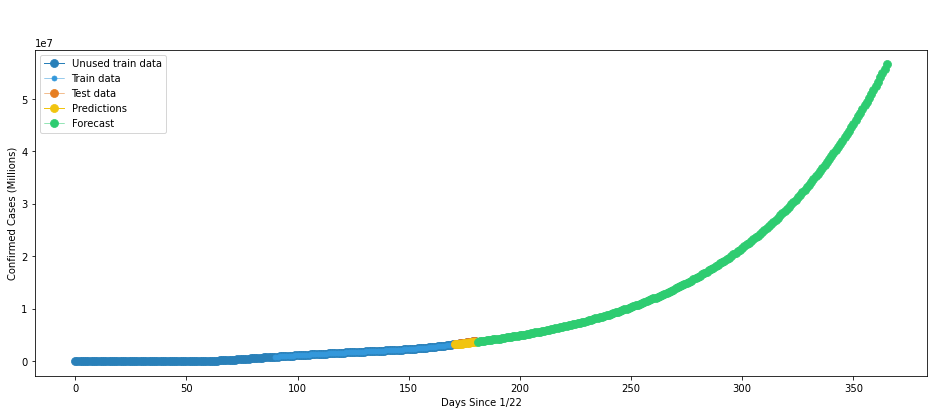

In [30]:
## Building a plot to visualize the prediction of daily cases of COVID-19 in the US toward Winter 
## 180 days since 1/22 will be 7/22. From 7/22, 120 days to 11/22 will show COVID-19's projected impact with confirmed cases in winter. 
## The impact is seen to be exponential according to this model

fig, ax = plt.subplots(figsize=(16, 6))

sns.lineplot(x=days.reshape(-1), y=covid_us_df['confirmed'],
             markeredgecolor="#2980b9", markerfacecolor="#2980b9", markersize=8, marker="o",
             sort=False, linewidth=1, color="#2980b9")

sns.lineplot(x=x_train.reshape(-1), y=y_train_l,
             markeredgecolor="#3498db", markerfacecolor="#3498db", markersize=5, marker="o",
             sort=False, linewidth=.5, color="#3498db")

sns.lineplot(x=x_test.reshape(-1), y=y_test_l,
             markeredgecolor="#e67e22", markerfacecolor="#e67e22", markersize=8, marker="o",
             sort=False, linewidth=.5, color="#e67e22")

sns.lineplot(x=x_test.reshape(-1), y=y_pred_l,
             markeredgecolor="#f1c40f", markerfacecolor="#f1c40f", markersize=8, marker="o",
             sort=False, linewidth=1, color="#f1c40f")

sns.lineplot(x=x_forecast, y=y_fore_l,
             markeredgecolor="#2ecc71", markerfacecolor="#2ecc71", markersize=8, marker="o",
             sort=False, linewidth=.5, color="#2ecc71")

plt.suptitle("COVID-19 Confirmed Cases and Forecasting in the United States", fontsize=16, fontweight='bold', color='white')

plt.ylabel('Confirmed Cases (Millions)')
plt.xlabel('Days Since 1/22')

plt.legend(['Unused train data', 'Train data', 'Test data', 'Predictions', 'Forecast'])
plt.savefig('reg.svg', format='svg', dpi=1200)
plt.show()

## Conclusion

* As we are able to infer, the prediction model shows in days past that there was a slow rise of daily cases and a potential to continue the trend upward. The forecast is exponential, likely to climb past 5 million cases within reaching the winter solstice on 12/21/2020 (360 days from the beginning of our data on 1/21/2020). Toward 6 million cases are forecasted within the first 30 days of Winter.

**_We may confirm the virus will accelerate spread based upon our forecast model_**